<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/2022-SE-27_LAB_TASKS_ML/blob/main/lab_7__2022_SE_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
loan_data = pd.read_csv('/content/loan_data.csv')

In [129]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [130]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [131]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [132]:
loan_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

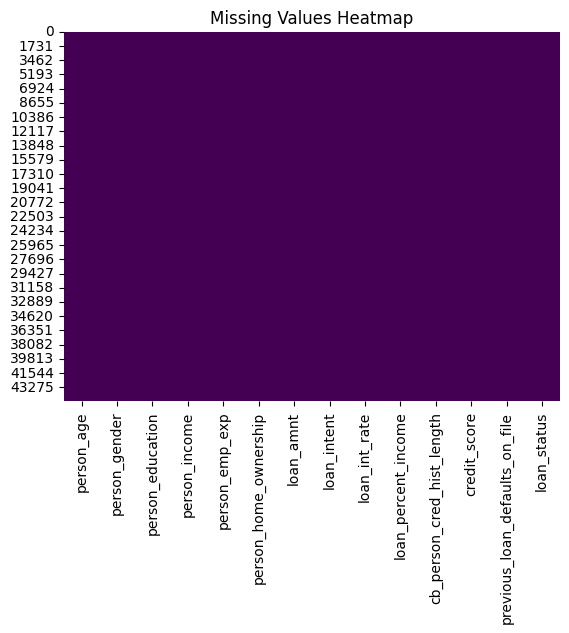

In [133]:
sns.heatmap(loan_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [134]:
loan_data.fillna({
    'person_age': loan_data['person_age'].median(),
    'person_income': loan_data['person_income'].median(),
    'person_emp_exp': loan_data['person_emp_exp'].median(),
    'loan_amnt': loan_data['loan_amnt'].median(),
    'loan_int_rate': loan_data['loan_int_rate'].mean(),
    'loan_percent_income': loan_data['loan_percent_income'].median(),
    'credit_score': loan_data['credit_score'].median()
}, inplace=True)


In [135]:
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score']
for col in num_cols:
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = loan_data[(data[col] >= lower_bound) & (loan_data[col] <= upper_bound)]

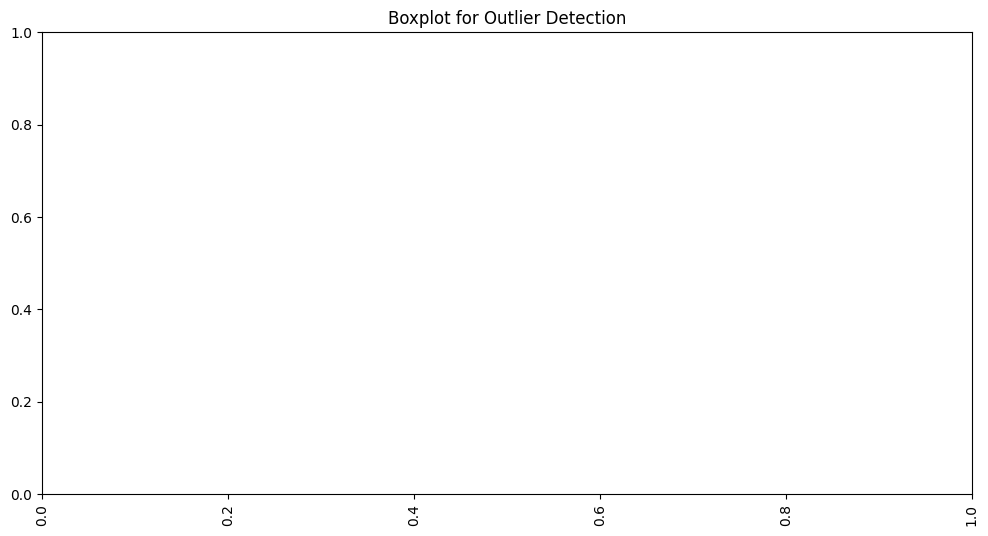

In [136]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [137]:
cat_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
le = LabelEncoder()
for col in cat_cols:
    loan_data[col] = le.fit_transform(loan_data[col])

In [140]:
X=loan_data[['person_income']]
Y=loan_data['loan_status']
model = LogisticRegression()
model.fit(X,Y)


LogisticRegression()

In [141]:
# Generate a range of values for X_test
X_test = np.linspace(0, 100000, 100).reshape(-1, 1)

In [142]:
X_test_normalized = (X_test - np.mean(X_test)) / np.std(X_test)

In [143]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [144]:
# Apply sigmoid function to normalized values
Y_pred = sigmoid(X_test_normalized)


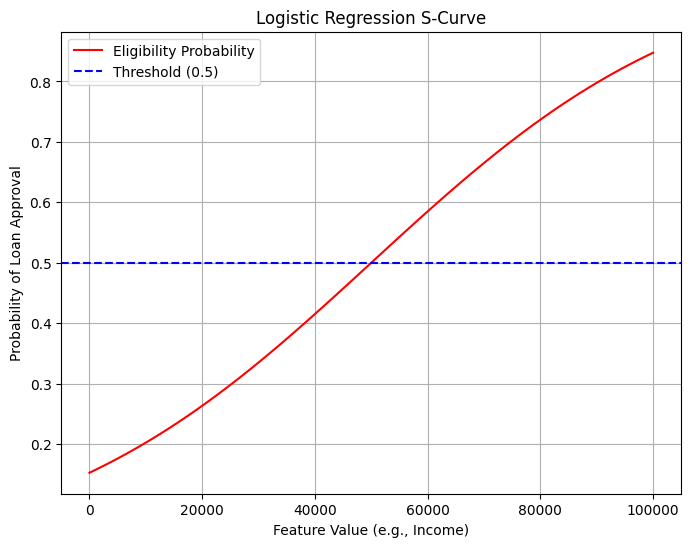

In [145]:
# Plot the correct sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(X_test, Y_pred, label="Eligibility Probability", color="red")
plt.axhline(0.5, color="blue", linestyle="--", label="Threshold (0.5)")
plt.title("Logistic Regression S-Curve")
plt.xlabel("Feature Value (e.g., Income)")
plt.ylabel("Probability of Loan Approval")
plt.legend()
plt.grid()
plt.show()